In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataB.csv')
df.drop(df.columns[0], axis = 1, inplace=True)
df.loc[:, df.columns != 'gnd'] = StandardScaler().fit_transform(df.loc[:, df.columns != 'gnd'])
s = df.drop('gnd', axis=1).values

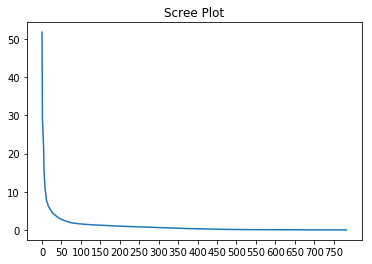

In [3]:
plt.plot(PCA().fit(s).explained_variance_)
plt.xticks(np.arange(0, 800, 50))
plt.title("Scree Plot")
# plt.savefig("Q2_ScreePlot.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

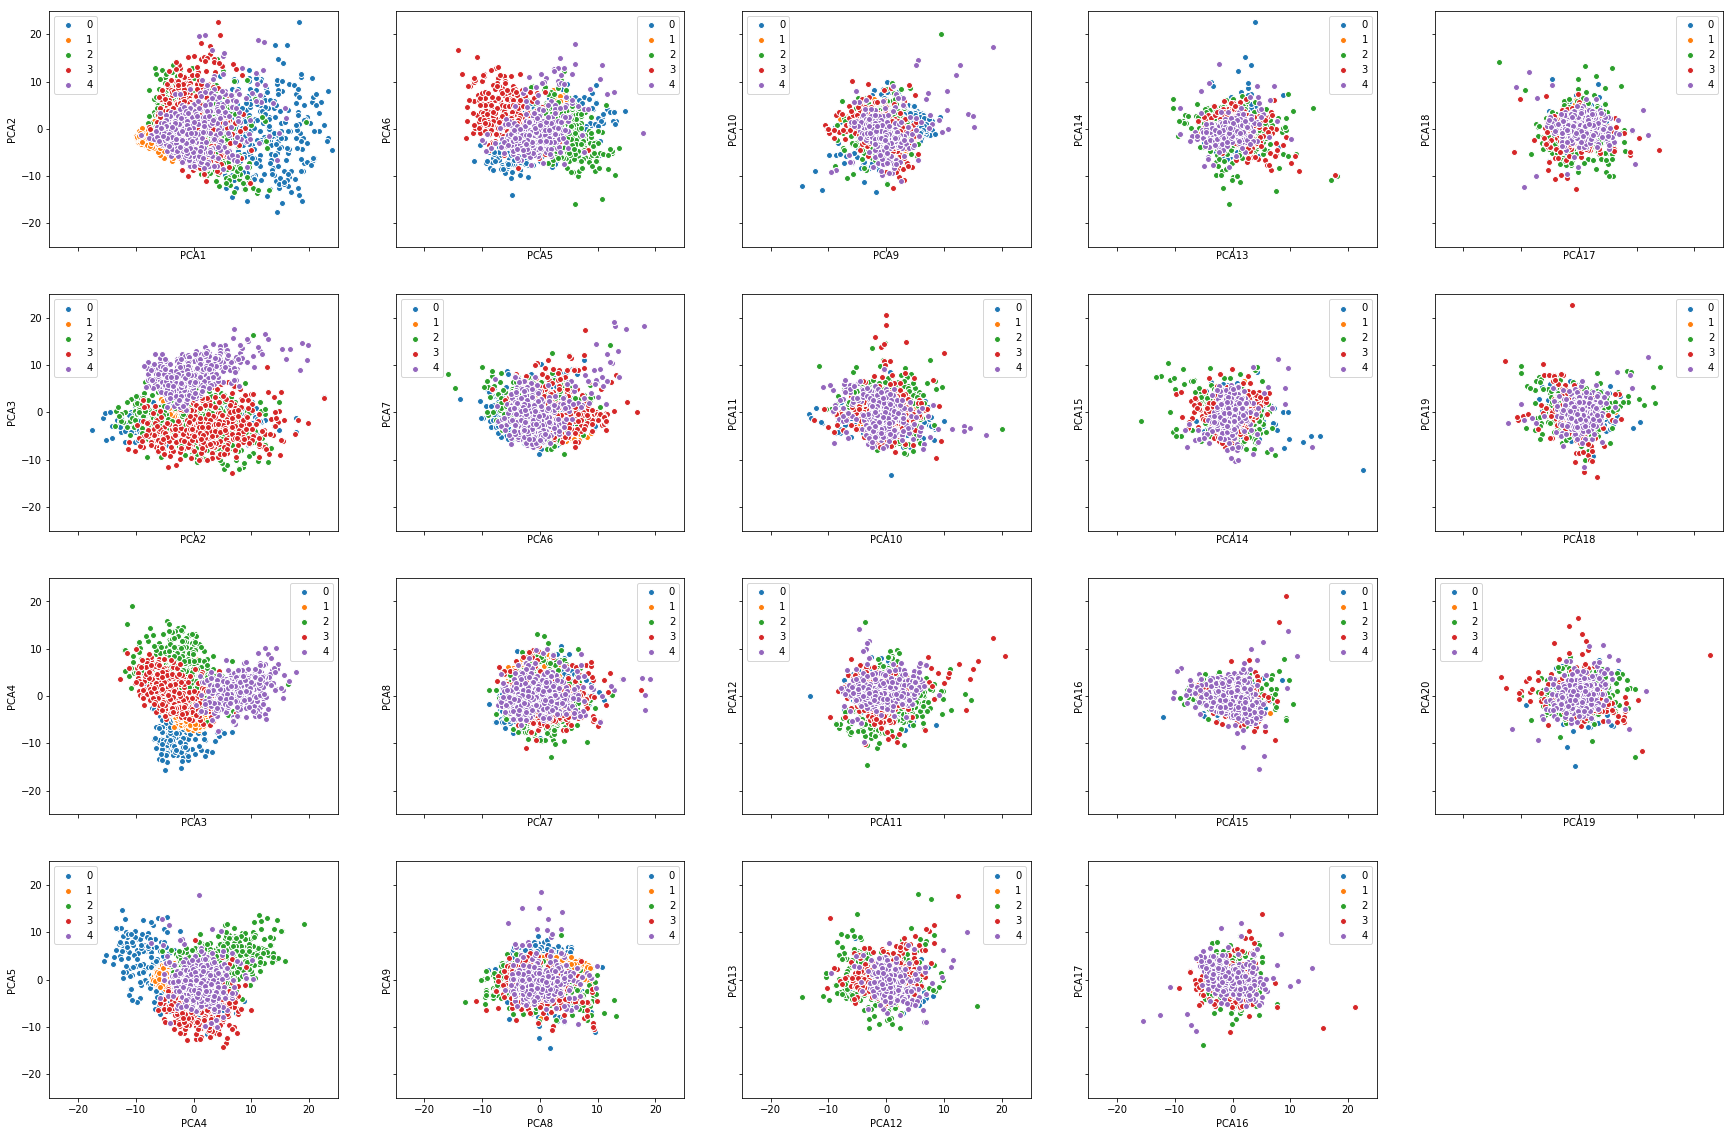

In [4]:
def plotTop(df2, label, total, row, l):
    f = plt.figure()
    f, axes = plt.subplots(nrows = row, ncols = total//row + 1, figsize=(30,20), sharex=True, sharey = True)
    for j in range(total):
        axes[j%row, j//row].set_xlabel(label + str(j+1))
        axes[j%row, j//row].set_ylabel(label + str(j+2))
        [axes[j%row, j//row].scatter(df2.loc[df2['gnd'] == i, j], df2.loc[df2['gnd'] == i, j + 1], edgecolors='w') for i in [*range(5)]]
        axes[j%row, j//row].set_xlim(-1 * l, l)
        axes[j%row, j//row].set_ylim(-1 * l, l)
        axes[j%row, j//row].legend([*range(5)])
    f.delaxes(axes.flatten()[total])
#     f.savefig('Q2_' + label + 'Top' + str(total) + '.png', dpi = 400, bbox_inches = 'tight')
    plt.show()
    
pcaDf = pd.DataFrame(data = PCA(n_components=20).fit_transform(s), columns = [*range(20)])
pcaDf['gnd'] = df[['gnd']]
plotTop(pcaDf, 'PCA', 19, 4, 25)

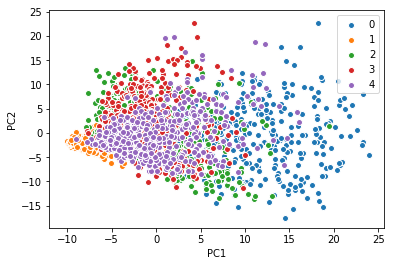

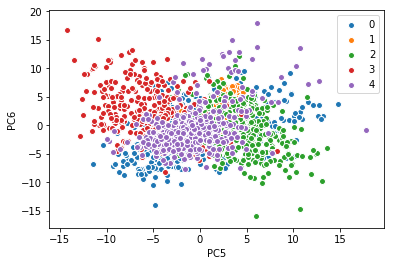

In [5]:
pcaDf = pd.DataFrame(data = PCA(n_components=6).fit_transform(df.drop('gnd', axis=1).values))
pcaDf['gnd'] = df[['gnd']]
for j in [[0, 1], [4, 5]]:
    fig, ax = plt.subplots()
    ax.set_xlabel('PC' + str(j[0]+1))
    ax.set_ylabel('PC' + str(j[1]+1))
    [ax.scatter(pcaDf.loc[pcaDf['gnd'] == i, j[0]], pcaDf.loc[pcaDf['gnd'] == i, j[1]], edgecolors='w') for i in [0, 1, 2, 3, 4]]
    ax.legend([0, 1, 2, 3, 4])
#     fig.savefig('Q2_PCA' + str(j[0]) + str(j[1]) + '.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

<Figure size 432x288 with 0 Axes>

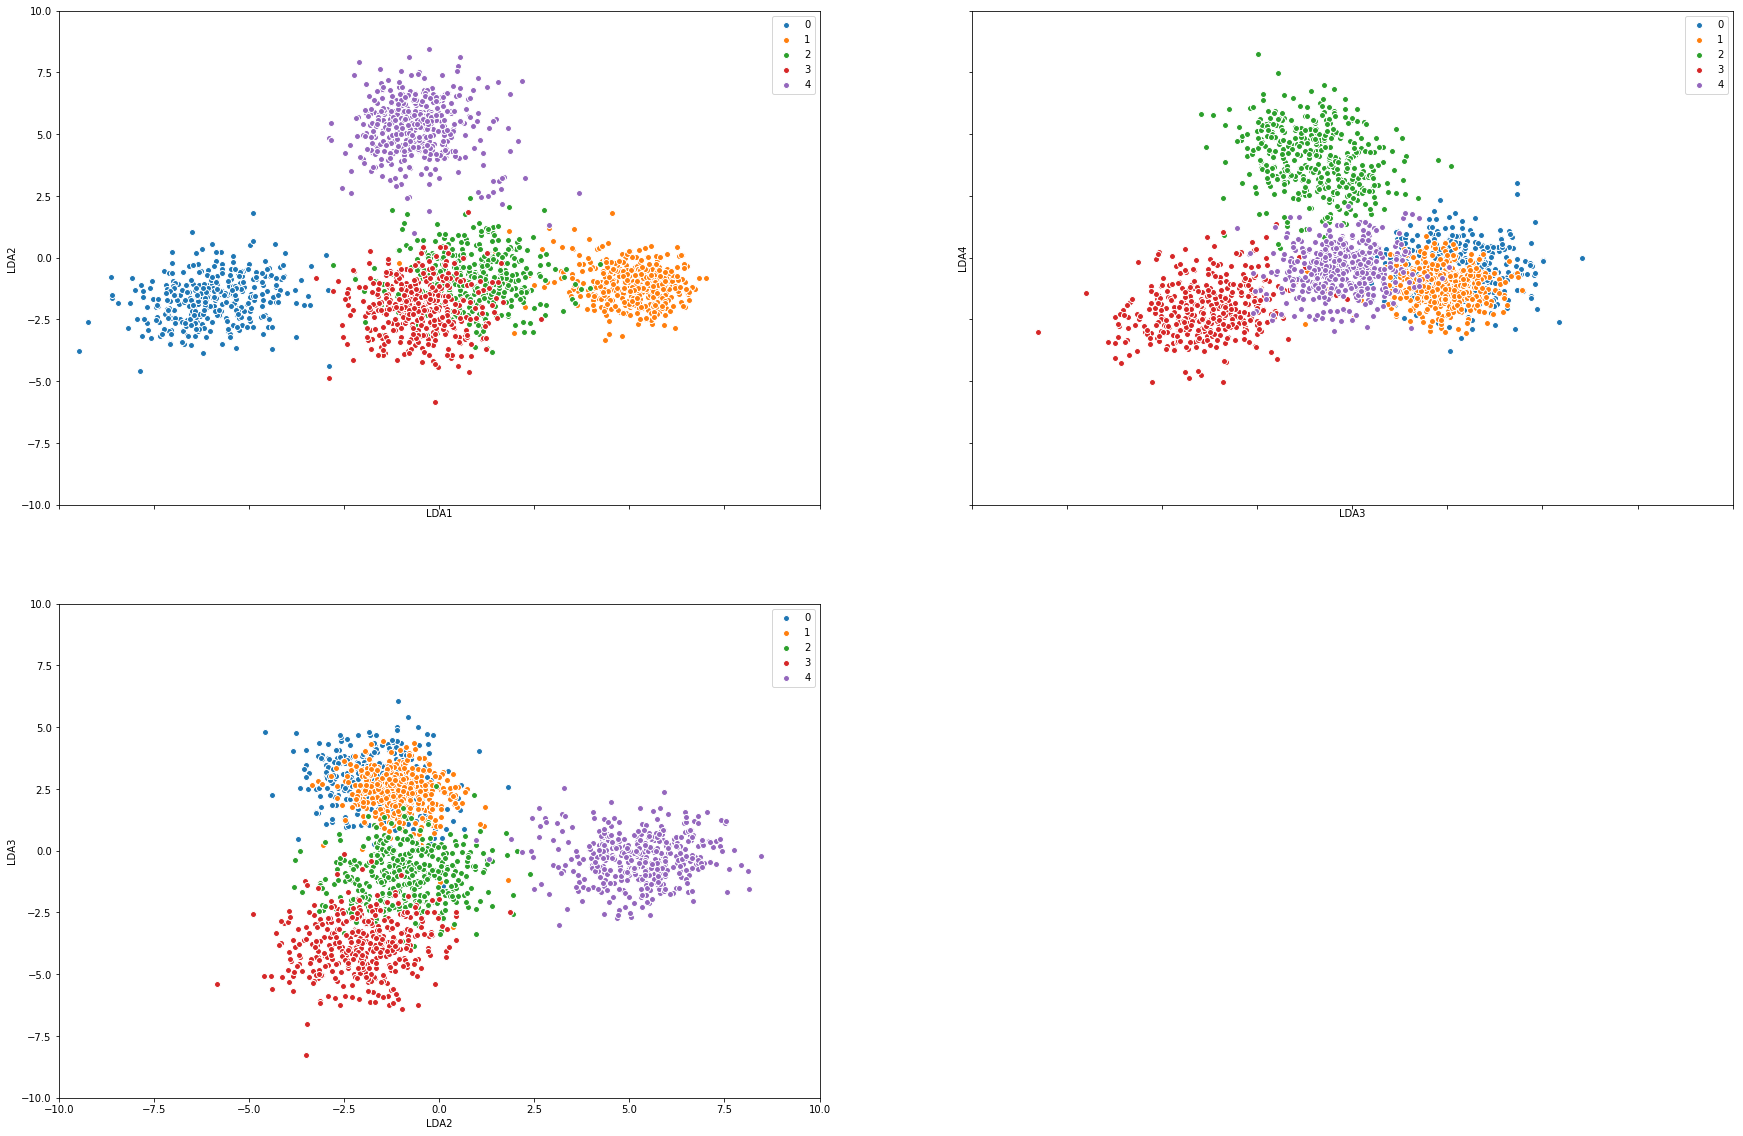

In [6]:
ldaDf = pd.DataFrame(data = LinearDiscriminantAnalysis().fit_transform(s, np.ravel(df[['gnd']])), columns = [*range(4)])
ldaDf['gnd'] = df[['gnd']]
plotTop(ldaDf, 'LDA', 3, 2, 10)

In [7]:
# input: an n*t array, n is the dimensionality and t is the number of training examples
def svd_np(x):
    eigValueU, eigVectorU = np.linalg.eigh(np.dot(x, x.T))
    eigValueV, eigVectorV = np.linalg.eigh(np.dot(x.T, x))
    idxU = eigValueU.argsort()[::-1]
    idxV = eigValueV.argsort()[::-1]
    return eigVectorU[:,idxU], np.sqrt(eigValueV[idxV] if x.shape[0] > x.shape[1] else eigValueU[idxU]), eigVectorV[:,idxV].T

U, sigma, Vt = svd_np(s.T)

In [16]:
# check if (sigma * Vt).T has the same result with build in PCA
print(np.allclose(np.absolute(np.diag(sigma).dot(Vt[:s.shape[1],:]).T), np.absolute(PCA().fit_transform(s))))

# check if (U.T.dot(s.T)).T, which is s.dot(U), has the same result with build in PCA
print(np.allclose(np.absolute(s.dot(U)), np.absolute(PCA().fit_transform(s))))

True
True
